#Assignment 05: Deep Learning

This Week's assignment is to train Deep Learning models on the `cats and dogs` images dataset to accurately classify the animal in the image.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 05: Deep Learning - Muntadher Alkaabi).


**Submission Deadline: Thursday, 2/17/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries for the Deep Learning project.
2. Download the dataset (the link is provided below).
3. Make sure to convert the target into one hot vector.
4. Create data pipeline with data augmentation.
    1. Read images using tensorflow.
    2. Make sure the pixels values are scaled between (`0-1`).
    3. Resize the images to (224,224).
    4. Apply multiple image augmentation on the data.
    5. Make sure the augmentation image pixels are scaled between (`0-1`). 
5. Plot the images.
6. Train CNN models (try ResNet architecture).
**Note:** use sub-class to create the ResNet model.


7. Use multiple Transfer Learning models.<br>
**Note:** make sure to chooses the right model with input shape (224,224,3).

8. Use the right evaluation metrics to choose the best model (write down your choice of the best model).


**Note:** To get the best performance from the model, manually tune the hyperparameters of each model. 

Find relevant links below:<br>
[Dataset](https://www.kaggle.com/aseemdandgaval/23-pet-breeds-image-classification)

[Submission Form](https://forms.gle/GGELZHoiB5pBtFXi9)<br>
[How to use kaggle with colab](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

Good luck and feel free to ask any questions in the or on the Questions channel.

In [ ]:
import shutil
shutil.rmtree('/content/Pet_Breeds')

# 1- Import all necessary libraries for the Deep Learning project

In [ ]:
# import the necessary libraries
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from sklearn import model_selection, metrics 
import os 
import glob 
import tqdm

# 2- Download the dataset

In [ ]:
# download the required dataset from kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d aseemdandgaval/23-pet-breeds-image-classification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
23-pet-breeds-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/23-pet-breeds-image-classification.zip

Archive:  /content/23-pet-breeds-image-classification.zip
  inflating: Pet_Breeds/abyssinian/abyssinian_1.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_10.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_100.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_101.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_102.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_103.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_104.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_105.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_106.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_107.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_108.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_109.jpeg  
  inflating: Pet_Breeds/abyssinian/abyssinian_11.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_110.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_111.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_112.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_113

In [ ]:
import os
import cv2
import imghdr

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        if f_path not in bad_images:
                          bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

In [ ]:
source_dir =r'/content/Pet_Breeds/'
good_exts=['jpg', 'jpeg' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  shiba inu
processing class directory  ragdoll cat
processing class directory  chihuahua
processing class directory  corgi
processing class directory  siamese cat
processing class directory  beagle
processing class directory  maine coon
processing class directory  husky
processing class directory  rottwiler
processing class directory  sphynx
processing class directory  boxer
processing class directory  abyssinian
processing class directory  dachshund
processing class directory  american shorthair
processing class directory  labrador
processing class directory  german shepherd
processing class directory  bulldog
processing class directory  persian cat
processing class directory  pug
processing class directory  golden retriever
processing class directory  yorkshire terrier
processing class directory  pomeranian
processing class directory  mumbai cat
file  /content/Pet_Breeds/mumbai cat/mumbai cat_71.jpg  is not a valid image file
improper image files are listed

In [ ]:
len(bad_file_list)

153

In [ ]:
p_th = "" 
for element in bad_file_list:
 os.remove(element)
 

In [ ]:
def create_dataframe(data_path):
    images_paths=[]
    labels = []
    list_cats_dogs=[]
  
    data_list=[]
   
    
    for element in os.listdir(data_path):
      for path in glob.glob(f'/content/Pet_Breeds/{element}/*'):
        list_cats_dogs.append(path)
        labels.append(element)
      
 


    df = pd.DataFrame({'paths': list_cats_dogs, 'labels': labels})
 
    
    return df
      
      


In [ ]:
data= create_dataframe('/content/Pet_Breeds')
print(data)

for i in set(data.labels):
  print(i)


                                                  paths      labels
0        /content/Pet_Breeds/shiba inu/shiba inu_19.jpg   shiba inu
1       /content/Pet_Breeds/shiba inu/shiba inu_148.jpg   shiba inu
2        /content/Pet_Breeds/shiba inu/shiba inu_13.jpg   shiba inu
3        /content/Pet_Breeds/shiba inu/shiba inu_67.jpg   shiba inu
4       /content/Pet_Breeds/shiba inu/shiba inu_114.jpg   shiba inu
...                                                 ...         ...
3723  /content/Pet_Breeds/mumbai cat/mumbai cat_129.jpg  mumbai cat
3724  /content/Pet_Breeds/mumbai cat/mumbai cat_137.jpg  mumbai cat
3725   /content/Pet_Breeds/mumbai cat/mumbai cat_92.jpg  mumbai cat
3726   /content/Pet_Breeds/mumbai cat/mumbai cat_86.jpg  mumbai cat
3727   /content/Pet_Breeds/mumbai cat/mumbai cat_80.jpg  mumbai cat

[3728 rows x 2 columns]
american shorthair
golden retriever
chihuahua
siamese cat
rottwiler
bulldog
persian cat
german shepherd
husky
mumbai cat
labrador
beagle
ragdoll cat
boxer
shib

In [ ]:
# convert the labels to indexs values 
def labels_to_indexs(column):
 
  col_unique= column.unique()
  label_index={}
  index_label={}
  for index,label in enumerate(col_unique):
    label_index[label]=index
    index_label[index]=label
  
  return label_index, index_label

In [ ]:
label_to_index,index_to_label = labels_to_indexs(data.labels)

data.labels.replace(label_to_index,inplace=True)

In [ ]:
data.labels

0        0
1        0
2        0
3        0
4        0
        ..
3723    22
3724    22
3725    22
3726    22
3727    22
Name: labels, Length: 3728, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data.paths, data.labels,
                                                                    test_size= 0.2, stratify = data.labels)

In [ ]:
# check the shape of the following (x_train, y_train and x_test, y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2982,)
(2982,)
(746,)
(746,)


# 3- Make sure to convert the target into one hot vector

In [ ]:

# # convert the labels to one hot vector

y_train_hot = tf.one_hot(y_train, depth = len(set(y_train)))
y_test_hot = tf.one_hot(y_test, depth = len(set(y_train)))


In [ ]:

print(f'y test hot encoder value of {y_test_hot[0]}')
print(f'y test value of {np.argmax(y_test_hot[0])}')


y test hot encoder value of [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y test value of 11


# 4- Create Data Pipeline with Data Augmentation


In [ ]:
# read images file from file path
def read_images(x,y):
    # write your code here
    x= tf.io.read_file(x)
    x= tf.image.decode_jpeg(x,channels=3)
    x = tf.image.convert_image_dtype(x, tf.float32)
    x= tf.image.resize(x, (224,224))


    return x, y

def image_aug(x,y):
    # write your code here
    x = tf.image.random_flip_left_right(x)
    x= tf.image.random_flip_up_down(x)
    x = tf.image.random_brightness(x,max_delta=32/255)
    x= tf.image.random_saturation(x,lower=0.5,upper=1.5)
    x = tf.clip_by_value(x,0.0,1.0)


    return x, y




In [ ]:
# create the data pipline 
def dataset_creater(x,y,training = True):
    # write your code here
    data = tf.data.Dataset.from_tensor_slices((x,y))
    data =data.shuffle(2048)
    data =data.map(read_images, num_parallel_calls=tf.data.AUTOTUNE)
    if training : 
        data =data.map(image_aug,num_parallel_calls=tf.data.AUTOTUNE)

    data = data.batch(32)
    data = data.prefetch(tf.data.AUTOTUNE)

    return data 
train_dataset = dataset_creater(x_train, y_train_hot)
test_dataset = dataset_creater(x_test,y_test_hot, training = False) 




# 5- Plot the images 

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(23,), dtype=float32)


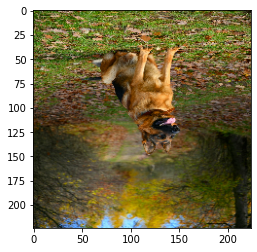

In [ ]:
#plot the augmented images 
for x ,y in train_dataset.take(1):
    print(y[0])
    plt.imshow(x[0])


# 6- Modeling
**Note:**
1. Train CNN models (try ResNet architecture).
1. Make sure to separate each model in a new sub-section.
2. Use multiple Transfer Learning models.
4. Use the right evaluation metrics to choose the best model (write down your choice of the best model).

## CNN Model
### Resnet Blocks 
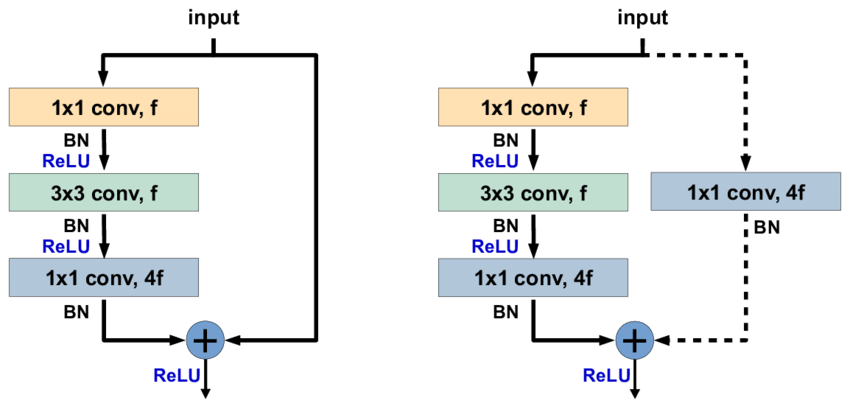

### Model ResNET

#### Identity Block

In [ ]:

#  identity block 
class IdenticalBlock(tf.keras.layers.Layer):
    def __init__(self,filters,**kwargs):
        super(IdenticalBlock,self).__init__(**kwargs)
        f1,f2= filters
        # layer 1
        self.conv_1 = tf.keras.layers.Conv2D(filters=f1,kernel_size=(1,1),use_bias=False,padding='valid')
        self.BN_conv_1 = tf.keras.layers.BatchNormalization()
        # layer 2 
        self.conv_2 = tf.keras.layers.Conv2D(filters=f1,kernel_size=(3,3),use_bias=False,padding='same')
        self.BN_conv_2 = tf.keras.layers.BatchNormalization()

        #layer 3 
        self.conv_3 = tf.keras.layers.Conv2D(filters=f2,kernel_size=(1,1),use_bias=False,padding='valid')
        self.BN_conv_3 = tf.keras.layers.BatchNormalization()
    def call(self, inputs):
        # layer 1 
        x=self.conv_1(inputs)
        x=self.BN_conv_1(x)
        x= tf.nn.relu(x)
        #layer 2 
        x=self.conv_2(x)
        x=self.BN_conv_2(x)
        x= tf.nn.relu(x)
        # layer 3 
        x=self.conv_3(x)
        x=self.BN_conv_3(x)

        add_layer = tf.keras.layers.Add()([x,inputs])
        add_layer = tf.nn.relu(add_layer)

        return add_layer

    def build_model(self,input_shape=[128,128,3]):
        inputs=tf.keras.layers.Input(input_shape)
        return tf.keras.Model(inputs=[inputs],outputs=[self.call(inputs)])

identical_block= IdenticalBlock([64,3],name='Bdentical_Block_1')

identical_block.build_model().summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  192         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

#### Convolution Block

In [ ]:

# convolution block 

class ConvBlock(tf.keras.layers.Layer):
    def __init__(self,filters,strides,**kwargs):
        super(ConvBlock,self).__init__(**kwargs)
        f1,f2= filters
        # layer 1
        self.conv_1 = tf.keras.layers.Conv2D(filters=f1,kernel_size=(1,1),use_bias=False,padding='valid')
        self.BN_conv_1 = tf.keras.layers.BatchNormalization()
        # layer 2 
        self.conv_2 = tf.keras.layers.Conv2D(filters=f1,kernel_size=(3,3),use_bias=False,padding='same')
        self.BN_conv_2 = tf.keras.layers.BatchNormalization()

        #layer 3 
        self.conv_3 = tf.keras.layers.Conv2D(filters=f2,kernel_size=(1,1),strides=strides,use_bias=False,padding='valid')
        self.BN_conv_3 = tf.keras.layers.BatchNormalization()

        #skip layer 
        self.skip_conv = tf.keras.layers.Conv2D(filters= f2,kernel_size=(1,1),strides=strides,use_bias=False,padding='valid')
        self.BN_skip_conv = tf.keras.layers.BatchNormalization()

    def call(self,inputs):
        x_skip=inputs
        # layer 1 
        x=self.conv_1(inputs)
        x=self.BN_conv_1(x)
        x= tf.nn.relu(x)
        #layer 2 
        x=self.conv_2(x)
        x=self.BN_conv_2(x)
        x= tf.nn.relu(x)
        # layer 3 
        x=self.conv_3(x)
        x=self.BN_conv_3(x)

        # skip path 
        x_skip= self.skip_conv(x_skip)
        x_skip = self.BN_skip_conv(x_skip)

        add_layer=tf.keras.layers.Add()([x,x_skip])
        add_layer = tf.nn.relu(add_layer)
        return add_layer
    def build_model(self,input_shape=[128,128,3]):
        inputs=tf.keras.layers.Input(input_shape)
        return tf.keras.Model(inputs=[inputs],outputs=[self.call(inputs)])
conv_block = ConvBlock(filters =[64,128],strides=(1,1), name='Conv_Block_1')
conv_block.build_model().summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 128, 128, 64  192         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 128, 128, 64  256        ['conv2d_3[0][0]']               
 rmalization)                   )                                                           

#### ResNet Model

In [ ]:
# create the ResNet blocks 

from warnings import filters
tf.keras.backend.clear_session()
class ResNet(tf.keras.Model):
    def __init__(self,**kwargs):
        super(ResNet,self).__init__(**kwargs)
        # Block 1 
        self.input_conv = tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),use_bias=False)
        self.BN_input_conv =tf.keras.layers.BatchNormalization()
        self.maxpool_1 = tf.keras.layers.MaxPool2D()
        # block 2 
        self.identical_block_1 = IdenticalBlock([64,32],name='identical_block_1')
        # block 3
        self.identical_block_2 = IdenticalBlock([64,32],name = 'identical_block_2')
        # block 4 
        self.conv_block_1 = ConvBlock([128,64],strides=(1,1),name='conv_block_1')
        self.maxpool_2 = tf.keras.layers.MaxPool2D()

        # block 5
        self.identical_block_3 = IdenticalBlock([128,64],name='identical_block_3')
        # block 6
        self.identical_block_4 = IdenticalBlock([128,64],name = 'identical_block_4')

        # block 7 
        self.out=tf.keras.layers.Dense(units=23)

    def call(self,inputs):
        x=self.input_conv(inputs)
        x=self.BN_input_conv(x)
        x= tf.nn.relu(x)
        x=self.maxpool_1(x)
        x =self.identical_block_1(x)
        x=self.identical_block_2(x)
        x= self.conv_block_1(x)
        x=self.maxpool_2(x)
        x =self.identical_block_3(x)
        x=self.identical_block_4(x)
        x= tf.keras.layers.Flatten()(x)
        out=self.out(x)
        out = tf.nn.softmax(out)



        return out
model_ResNET = ResNet()
model_ResNET.build([None,224,224,3])



### Model evaluation (ResNET)

In [ ]:
model_ResNET.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
model_ResNET.fit(train_dataset,epochs=2,validation_data=test_dataset)

Epoch 1/2
94/94 [==============================] - 110s 1s/step - loss: 65.9337 - acc: 0.0436 - val_loss: 5.2677 - val_acc: 0.0282
Epoch 2/2
94/94 [==============================] - 89s 950ms/step - loss: 4.0636 - acc: 0.0761 - val_loss: 4.3339 - val_acc: 0.0429


<font size='4'>The Accuracy of Model Evaluation  is 0.0576 </font>

--------------------------------------------------

## Transfer learning

### 1.Xception

   



In [ ]:
cnn_model_xception= tf.keras.applications.Xception(include_top=False,input_shape=(224,224,3))
cnn_model_xception.trainable=False
cnn_model_xception.summary()


Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:

model_xception = tf.keras.Sequential([
                             cnn_model_xception,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(23,activation=tf.nn.softmax)
])
model_xception.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 23)                47127     
                                                                 
Total params: 20,908,607
Trainable params: 47,127
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model_xception.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
model_xception.fit(train_dataset,epochs=6,validation_data=test_dataset)

Epoch 1/6
94/94 [==============================] - 95s 962ms/step - loss: 1.4588 - acc: 0.6137 - val_loss: 0.5843 - val_acc: 0.8485
Epoch 2/6
94/94 [==============================] - 97s 1s/step - loss: 0.8055 - acc: 0.7643 - val_loss: 0.4781 - val_acc: 0.8673
Epoch 3/6
94/94 [==============================] - 90s 958ms/step - loss: 0.6889 - acc: 0.7884 - val_loss: 0.4516 - val_acc: 0.8619
Epoch 4/6
94/94 [==============================] - 87s 924ms/step - loss: 0.6237 - acc: 0.8099 - val_loss: 0.4195 - val_acc: 0.8901
Epoch 5/6
94/94 [==============================] - 85s 906ms/step - loss: 0.5445 - acc: 0.8377 - val_loss: 0.4467 - val_acc: 0.8727
Epoch 6/6
94/94 [==============================] - 85s 902ms/step - loss: 0.5043 - acc: 0.8518 - val_loss: 0.4250 - val_acc: 0.8753


<font size='4'>The Accuracy of Model Evaluation  is 0.8753 </font>

--------------------

### 2.DenseNet201

In [ ]:
cnn_model_deNet201 = tf.keras.applications.DenseNet201(include_top=False,input_shape=(224,224,3))

cnn_model_deNet201.trainable=False
cnn_model_deNet201.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:

model_denNet201 = tf.keras.Sequential([
                             cnn_model_deNet201,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(23,activation=tf.nn.softmax)
])
model_denNet201.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_1   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 23)                2967      
                                                                 
Total params: 18,570,839
Trainable params: 248,855
Non-trainable params: 18,321,984
____________________________________

In [ ]:
model_denNet201.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
model_denNet201.fit(train_dataset,epochs=6,validation_data=test_dataset)

Epoch 1/6
94/94 [==============================] - 122s 1s/step - loss: 1.8447 - acc: 0.4752 - val_loss: 0.6329 - val_acc: 0.8137
Epoch 2/6
94/94 [==============================] - 100s 1s/step - loss: 0.9755 - acc: 0.6982 - val_loss: 0.4822 - val_acc: 0.8418
Epoch 3/6
94/94 [==============================] - 102s 1s/step - loss: 0.7638 - acc: 0.7720 - val_loss: 0.4119 - val_acc: 0.8673
Epoch 4/6
94/94 [==============================] - 94s 997ms/step - loss: 0.6599 - acc: 0.7887 - val_loss: 0.3797 - val_acc: 0.8887
Epoch 5/6
94/94 [==============================] - 90s 949ms/step - loss: 0.5987 - acc: 0.8089 - val_loss: 0.4069 - val_acc: 0.8780
Epoch 6/6
94/94 [==============================] - 90s 953ms/step - loss: 0.5255 - acc: 0.8384 - val_loss: 0.4150 - val_acc: 0.8794


<font size='4'>The Accuracy of Model Evaluation  is 0.8794 </font>

------------------------------------------

### 3.InceptionV3

In [ ]:
cnn_model_InceptionV3 = tf.keras.applications.InceptionV3(include_top=False,input_shape=(224,224,3))
cnn_model_InceptionV3.trainable=False
cnn_model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
tf.keras.backend.clear_session()
model_InceptionV3 = tf.keras.Sequential([
                             cnn_model_InceptionV3,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             
                             tf.keras.layers.Dense(23,activation=tf.nn.softmax)
])
model_InceptionV3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 23)                47127     
                                                                 
Total params: 21,849,911
Trainable params: 47,127
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model_InceptionV3.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
model_InceptionV3.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
94/94 [==============================] - 105s 1s/step - loss: 1.5716 - acc: 0.5516 - val_loss: 0.5937 - val_acc: 0.8150
Epoch 2/5
94/94 [==============================] - 88s 941ms/step - loss: 0.8952 - acc: 0.7341 - val_loss: 0.5487 - val_acc: 0.8217
Epoch 3/5
94/94 [==============================] - 93s 987ms/step - loss: 0.7538 - acc: 0.7730 - val_loss: 0.4748 - val_acc: 0.8579
Epoch 4/5
94/94 [==============================] - 90s 956ms/step - loss: 0.6727 - acc: 0.7995 - val_loss: 0.4770 - val_acc: 0.8566
Epoch 5/5
94/94 [==============================] - 96s 1s/step - loss: 0.6455 - acc: 0.8048 - val_loss: 0.4527 - val_acc: 0.8673


<font size='4'>The Accuracy of Model Evaluation  is 0.8673 </font>

-----------------------

### Models evaluation 

In [ ]:
# evaluate the model
print("The Accuracy of Model Evaluation (Xception) is 0.8753")
print("The Accuracy of Model Evaluation (DenseNET201) is 0.8794")
print("The Accuracy of Model Evaluation (InceptionV3) is 0.8673")

The Accuracy of Model Evaluation (Xception) is 0.8753
The Accuracy of Model Evaluation (DenseNET201) is 0.8794
The Accuracy of Model Evaluation (InceptionV3) is 0.8673


<font size='5'>The Best Model (DenseNET201) is 0.8794</font>